# EDA

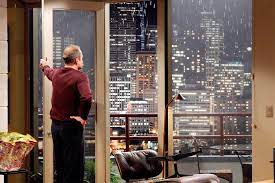

Bonnie Williams	-Seller-	

Has several houses, some in bad neighborhoods
willing to evict people
timing?
big returns, open for renovations

In [8]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [20]:
#import the house details from csv
df_houses = pd.read_csv('data/house_details.csv')

#display first 7 rows
df_houses.head(7)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,...,0.000,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,...,0.000,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,...,0.000,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801
5,3600057,4.000,2.000,1650.000,3504.000,1.000,0.000,0.000,3,7,...,20130.000,98144,47.580,-122.294,1480.000,3504.000,2015-03-19,402500.000,3600057,3554
6,3600072,4.000,2.750,2220.000,5310.000,1.000,NaN,0.000,5,7,...,NaN,98144,47.580,-122.294,1540.000,4200.000,2015-03-30,680000.000,3600072,18507


In [208]:
#overview over the data
df_houses.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


<Axes: >

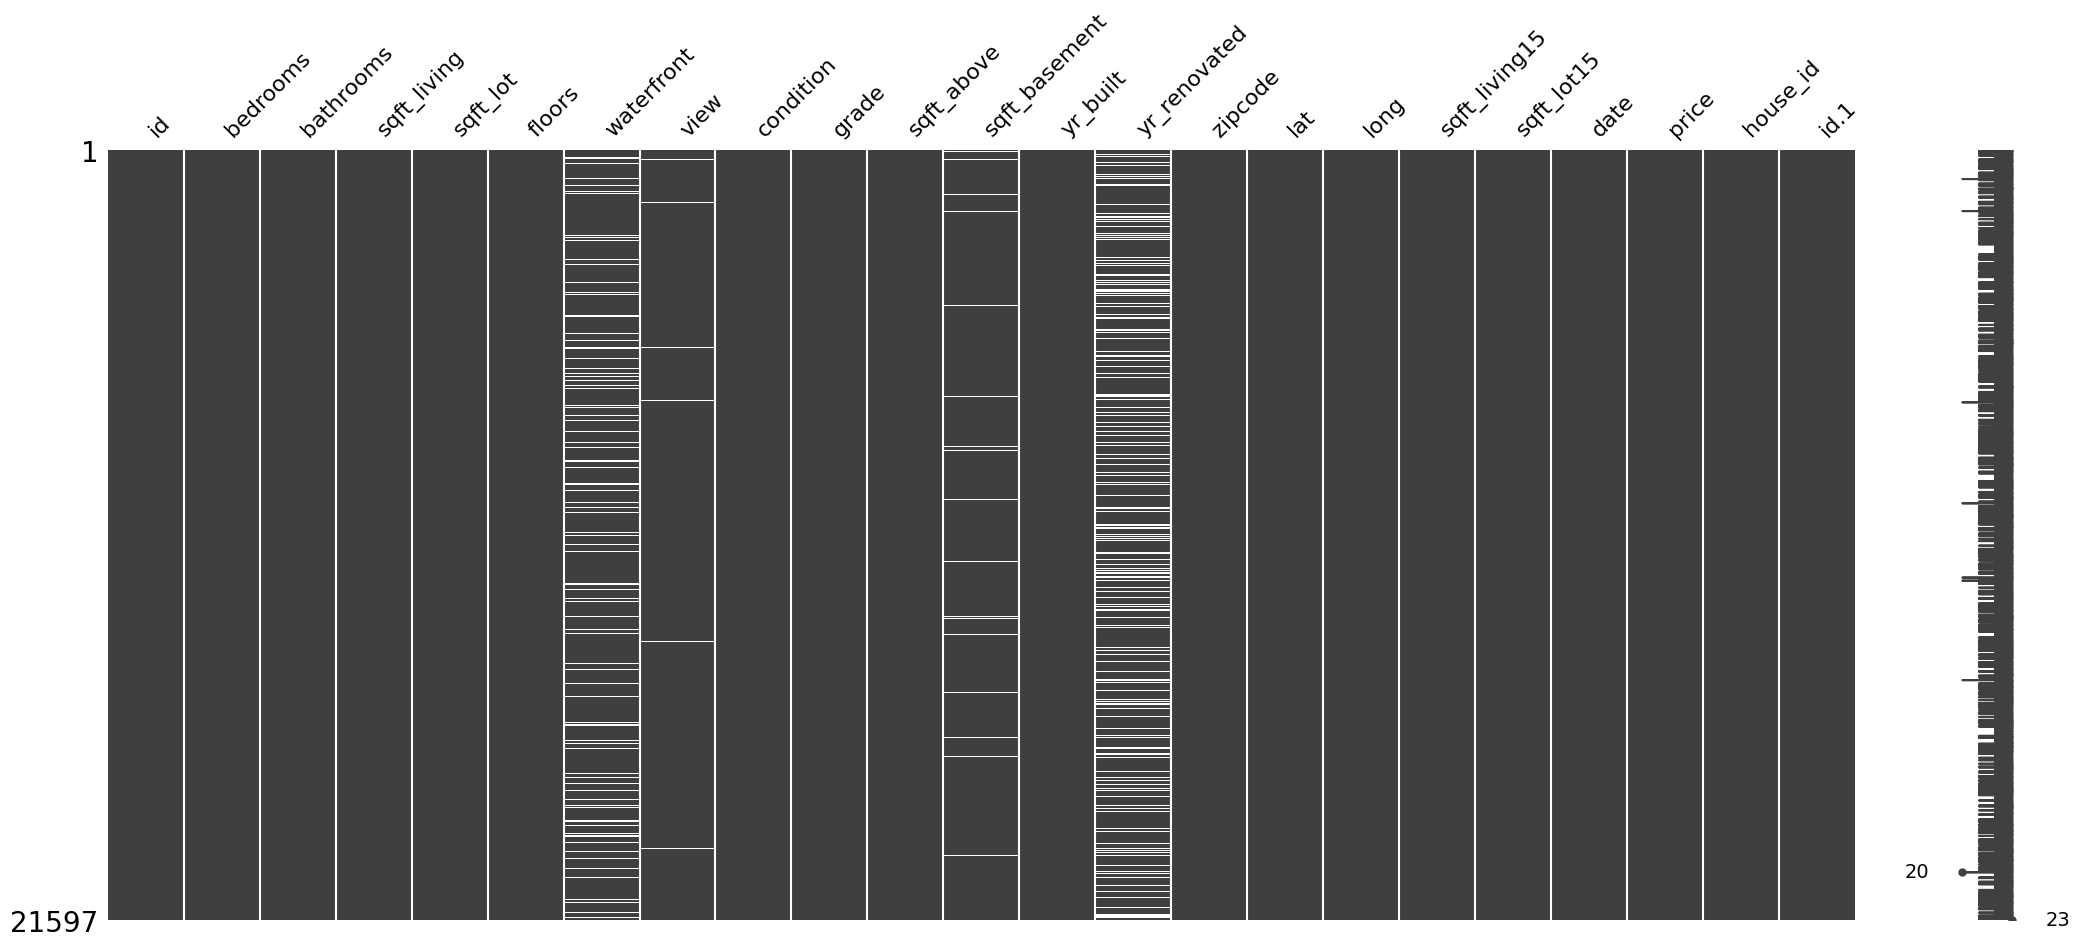

In [11]:
#import missingno and display the form of the dataframe
import missingno as msno
msno.matrix(df_houses)

In [12]:
# check how many duplicated rows exist in the data frame
df_houses.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [13]:
# check data types in data frame
df_houses.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id.1               int64
dtype: object

In [18]:
# change "date" dtype to datetime with format %Y/%m/%d
df_houses['date'] = pd.to_datetime(df_houses['date'], format="%Y-%m-%d")
df_houses.dtypes

id                        int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
price                   float64
house_id                  int64
id.1                      int64
dtype: object

<Axes: >

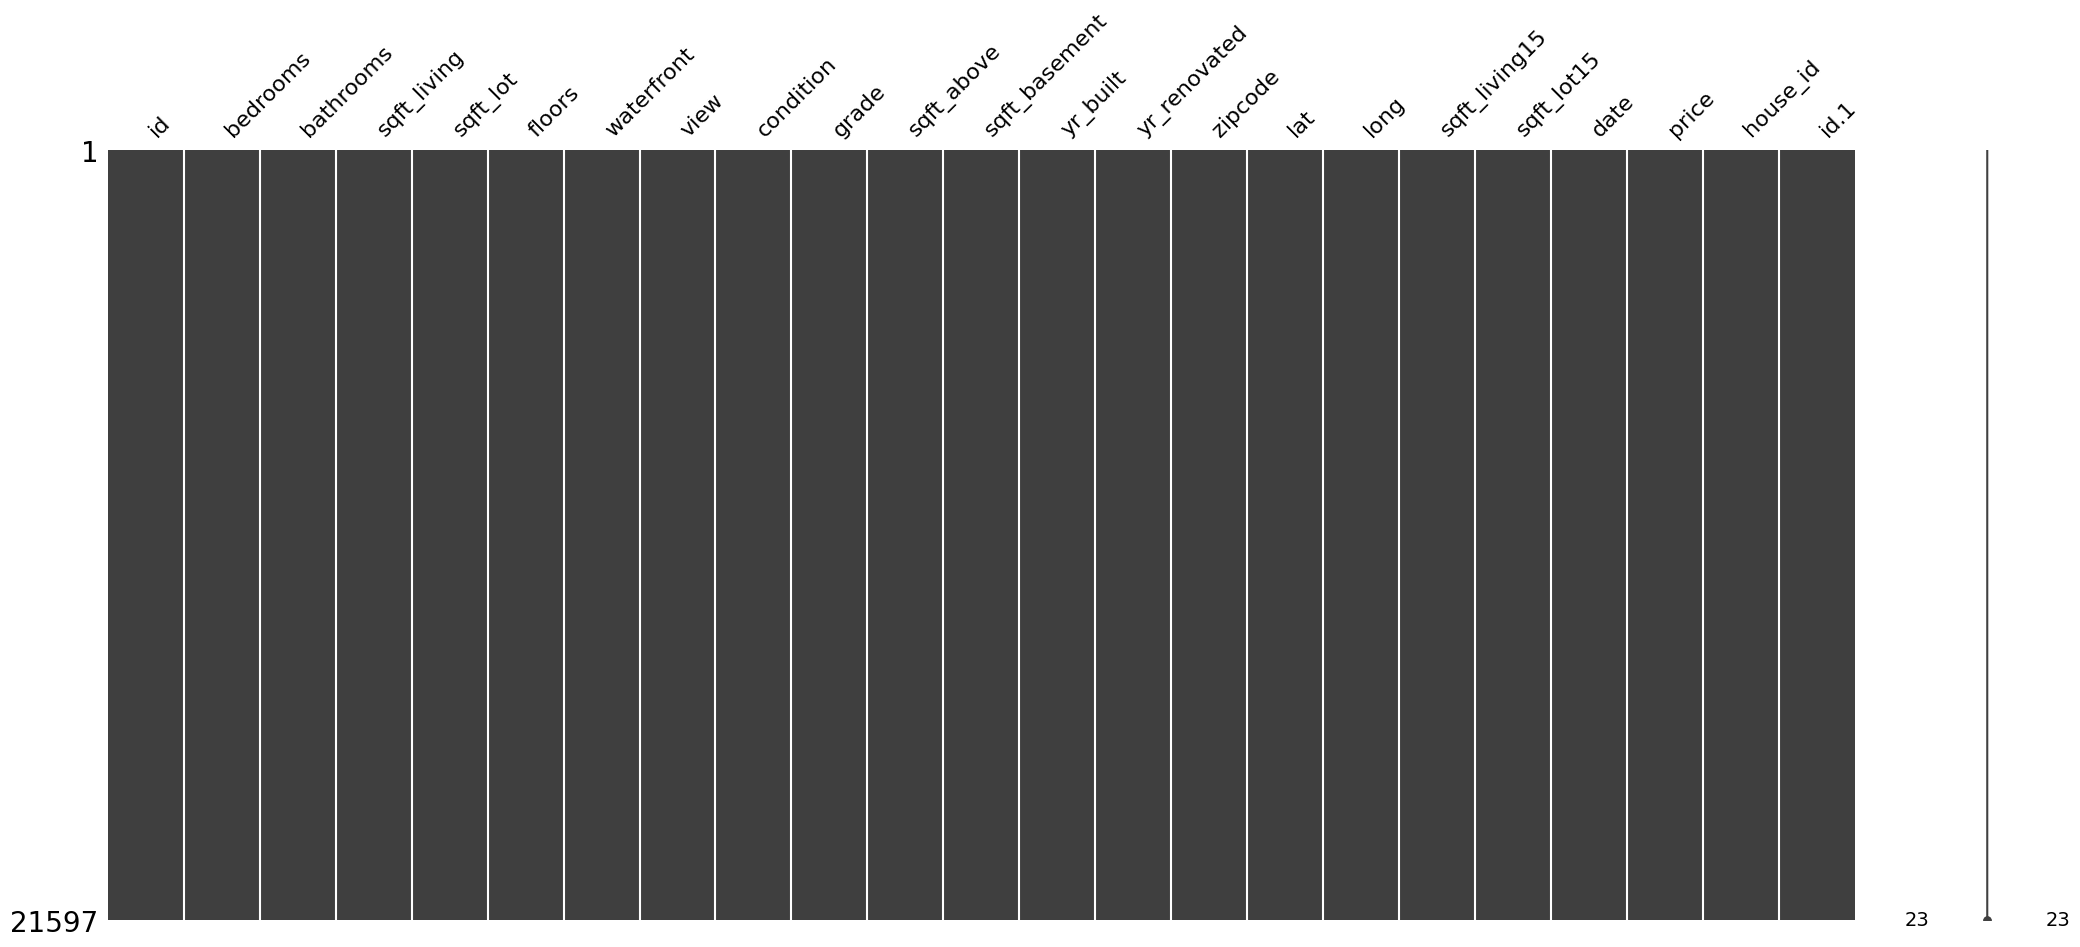

In [183]:
# create a copy of the dataset
df_houses_copied = df_houses.copy()

#fill missing cells with 0
houses_filled = df_houses_copied.fillna(0)

#check the form
msno.matrix(houses_filled)



In [ ]:
# Convert the 'ZipCode' column to string
houses_filled['zipcode'] = houses_filled['zipcode'].astype(str)

In [ ]:
# year is displayed with a 0 as last int
houses_filled['yr_renovated'].head(10)

In [ ]:
# removing the last 0
houses_filled['yr_renovated'] = houses_filled['yr_renovated'].apply(lambda x: x/10)
houses_filled['yr_renovated'].head(10)

In [253]:
#searching for cheap houses
houses_filled['price'].describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

######
Recommendation: Invest in a district that has high demand with cheap houses
######

In [635]:
#sort by the price
top_quantile = houses_filled['price'].quantile(0.75)
middle_quantile = houses_filled['price'].quantile(0.5)
bottom_quantile = houses_filled['price'].quantile(0.25)

cheap_houses = houses_filled[houses_filled['price']<= bottom_quantile]

cheap_houses.describe()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,...,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000
mean,4538675489.933,3.036,1.664,1466.555,10436.148,1.275,0.000,0.039,3.411,6.805,...,148.045,1967.235,40.139,47.441,-122.226,1556.114,9780.113,251769.994,4538675489.933,10313.483
std,2854825509.156,0.800,0.615,470.464,23357.472,0.450,0.019,0.292,0.661,0.727,...,291.566,24.938,279.855,0.132,0.133,384.680,16490.894,48252.199,2854825509.156,5984.365
min,1000102.000,1.000,0.500,370.000,572.000,1.000,0.000,0.000,1.000,3.000,...,0.000,1900.000,0.000,47.176,-122.512,460.000,651.000,78000.000,1000102.000,1.000
25%,2025701107.500,3.000,1.000,1110.000,6000.000,1.000,0.000,0.000,3.000,6.000,...,0.000,1951.000,0.000,47.341,-122.323,1280.000,6120.000,220000.000,2025701107.500,5268.500
50%,3832710900.000,3.000,1.750,1420.000,7788.500,1.000,0.000,0.000,3.000,7.000,...,0.000,1967.000,0.000,47.425,-122.263,1520.000,7805.500,259000.000,3832710900.000,10227.500
75%,7334501047.500,3.000,2.250,1780.000,9727.500,1.500,0.000,0.000,4.000,7.000,...,100.000,1986.000,0.000,47.508,-122.170,1790.000,9450.000,290000.000,7334501047.500,15431.250
max,9900000190.000,7.000,5.250,3490.000,1164794.000,3.000,1.000,4.000,5.000,10.000,...,1570.000,2015.000,2015.000,47.778,-121.315,3557.000,392040.000,322000.000,9900000190.000,21587.000


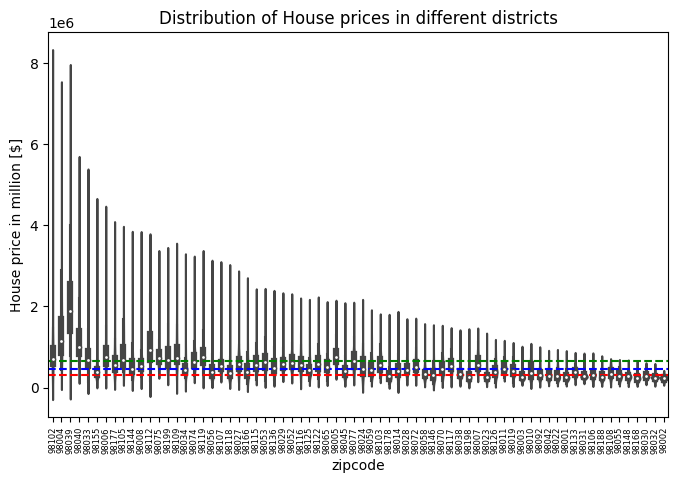

In [640]:

price_sorted = houses_filled.sort_values(by='price', ascending=False)

#plot of prices per district
#ax = sns.barplot(data= price_sorted, x= 'zipcode', y='price')
ax = sns.violinplot(data= price_sorted, x= 'zipcode', y='price')

#set thresholds

threshold_T = top_quantile
plt.axhline(y=threshold_T, color='g', linestyle='--', label='Threshold')

threshold_M = middle_quantile
plt.axhline(y=threshold_M, color='b', linestyle='--', label='Threshold')

threshold_B= bottom_quantile
plt.axhline(y=threshold_B, color='r', linestyle='--', label='Threshold')

# Rotate x-axis tick labels to vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)
ax.set_ylabel('House price in million [$]')
ax.set_title('Distribution of House prices in different districts')

# Show the plot
plt.show()

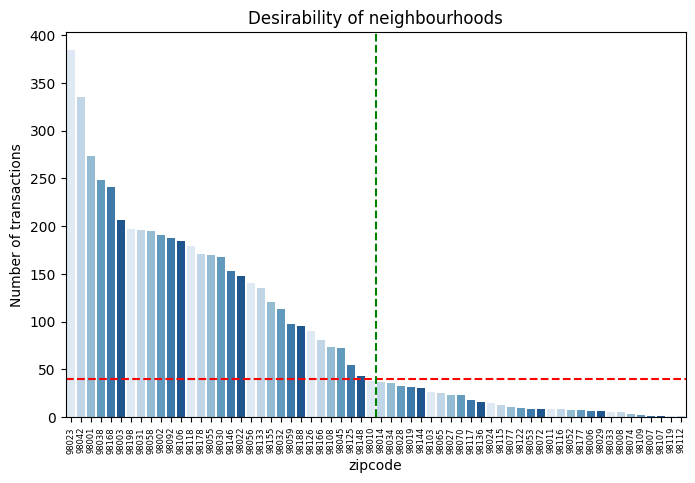

In [471]:
#descending order of house counts
house_count = cheap_houses['zipcode'].value_counts()
desc_order = house_count.nlargest(cheap_houses['zipcode'].nunique()).index

#plot of cheap houses per district
palette1 = sns.color_palette("Blues")
ax = sns.countplot(data= cheap_sorted, x= 'zipcode', order=desc_order,palette=palette1)

threshold1 = 40
threshold2 = (cheap_houses['zipcode'].nunique()-1)/2
plt.axhline(y=threshold1, color='r', linestyle='--', label='Threshold')
plt.axvline(x=threshold2, color='g', linestyle='--', label='Threshold')

# Rotate x-axis tick labels to vertical and label plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)
ax.set_ylabel('Number of transactions')
ax.set_title('Desirability of neighbourhoods')
# Show the plot
plt.show()

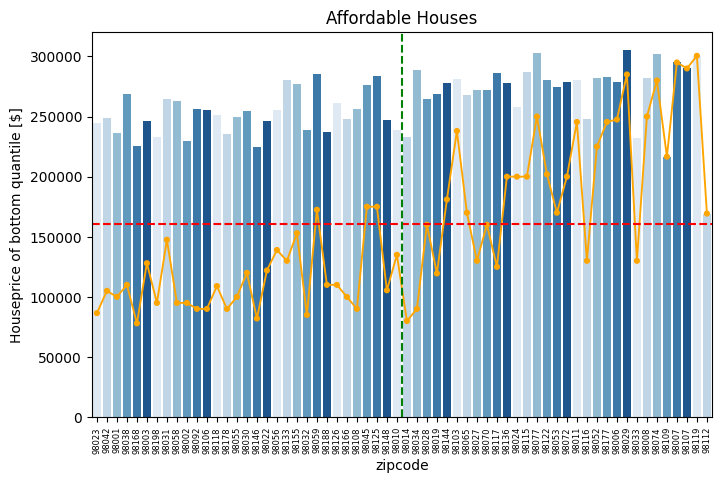

In [470]:

#sort by the max
#cheap_sorted_max = cheap_houses.groupby(["zipcode"])['price'].aggregate(np.max).reset_index().sort_values('price', ascending=False)

#sort by the mean
cheap_sorted_mean = cheap_houses.groupby(["zipcode"])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)

#sort by the min
cheap_sorted_min = cheap_houses.groupby(["zipcode"])['price'].aggregate(np.min).reset_index().sort_values('price', ascending=False)


#to change color
palette1 = sns.color_palette("Blues")
#palette2 = sns.color_palette("Spectral")

#plot of cheap houses per district
#ax = sns.boxplot(data= cheap_sorted_max, x= 'zipcode', y='price', order=desc_order)
ax = sns.barplot(data= cheap_sorted_mean, x= 'zipcode', y='price',order=desc_order,palette=palette1)
ax = sns.pointplot(data= cheap_sorted_min, x= 'zipcode', y='price', order=desc_order,color="orange",scale=0.5)#palette=palette2)

# Rotate x-axis tick labels to vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)

# Set threshold value for vertical and horizontal lines
threshold1 = bottom_quantile/2
threshold2 = (cheap_houses['zipcode'].nunique()-1)/2

# Add a horizontal threshold line using axhline()
plt.axhline(y=threshold1, color='r', linestyle='--', label='Threshold')
plt.axvline(x=threshold2, color='g', linestyle='--', label='Threshold')
ax.set_ylabel('Houseprice of bottom quantile [$]')
ax.set_title('Affordable Houses')
# Show the plot
plt.show()

In [671]:
# zip codes that have minimum house price under 12,5% threshold
to_search = ["98116", "98008", "98117", "98027", "98148", "98010", "98014", "98034","90019"]

#houses from the "bad" neighbourhoods (less than 40 transactions) & cheap price
bad_houses = cheap_houses[(cheap_houses['zipcode'].isin(to_search)) & (cheap_houses["price"]<(bottom_quantile/2))].sort_values(by='price')

#filter by low condition and high grade
low_quality_houses = bad_houses[(bad_houses["condition"]>=3) & (bad_houses["grade"]>=7)]

#filter by selling date in summertime
risky_houses = low_quality_houses[~low_quality_houses["date"].between('2014-09-01', '2015-02-28')]
risky_houses

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
2192,1049010620,2.000,1.000,790.000,2640.000,1.000,0.000,0.000,3,7,...,0.000,98034,47.735,-122.178,1310.000,2064.000,2014-05-13,90000.000,1049010620,12540
12447,5061300030,2.000,1.500,980.000,5000.000,2.000,0.000,0.000,3,7,...,2003.000,98014,47.708,-121.359,1040.000,5000.000,2014-05-08,134000.000,5061300030,2588


In [670]:
#write output to csv
output_csv= "output/risky_houses.csv"

risky_houses.to_csv(output_csv,index=False)

######
Recommendation: Invest in a district that is trendy. Meaning that other people are already investing there and it might be worth joining.
######

In [620]:
#filter and count renovated houses
houses_renovated = cheap_houses[cheap_houses['yr_renovated'] > 0]
#filter and count not renovated houses
houses_not_renovated = cheap_houses[cheap_houses['yr_renovated'] == 0]

print(houses_renovated['yr_renovated'].count())
print(houses_not_renovated['yr_renovated'].count())


109
5297


In [619]:
#how many different districts are there
print(houses_filled['zipcode'].nunique())
print(houses_renovated['zipcode'].nunique())

70
44


In [618]:
#most common district with renovated
mode_renovated = houses_renovated['zipcode'].mode().iloc[0]
print(mode_renovated)
#most common district not renovated
mode_not_renovated = houses_not_renovated['zipcode'].mode().iloc[0]
print(mode_not_renovated)

98022
98023


In [454]:
#have the houses been recently renovated after the year 2000?
recently_renovated = houses_renovated[houses_renovated["yr_renovated"] > 2000]
recently_renovated["yr_renovated"].describe()

count     40.000
mean    2009.425
std        4.284
min     2001.000
25%     2006.750
50%     2009.000
75%     2013.250
max     2015.000
Name: yr_renovated, dtype: float64

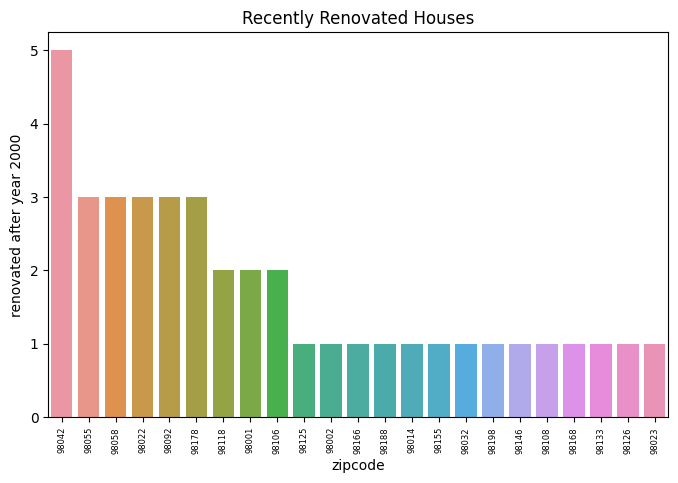

In [669]:
#descending order of renovated counts
renovated_count = recently_renovated["zipcode"].value_counts()
ren_order = renovated_count.nlargest(cheap_houses['zipcode'].nunique()).index

#plot of prices per district
ax = sns.countplot(data= recently_renovated, x= 'zipcode',order=ren_order)


# Rotate x-axis tick labels to vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)
ax.set_ylabel('renovated after year 2000')
ax.set_title('Recently Renovated Houses')

# Show the plot
plt.show()

In [455]:
#most common district with recently renovated as most appealing district
mode_recently_renovated = recently_renovated['zipcode'].mode().iloc[0]
print(mode_recently_renovated)

98042


In [616]:
#number of renovated houses in the most appealing district
count_renovated = recently_renovated[recently_renovated['zipcode'] == mode_recently_renovated].sort_values(by='price')
count_renovated["id"].count()

5

In [617]:
#number of not renovated houses in the most appealing district
not_renovated_count = houses_not_renovated[houses_not_renovated['zipcode'] == mode_recently_renovated]
not_renovated_count["id"].count()

329

In [615]:
#not renovated houses in the most appealing district
appealing_houses = houses_not_renovated[houses_not_renovated['zipcode'] == mode_recently_renovated].sort_values(by='price')

#filter by good condition and high grade
good_app_houses = appealing_houses[(appealing_houses["condition"]>=4) & (appealing_houses["grade"]>=8)]

#filter by selling date in summertime
trendy_houses = good_app_houses[~good_app_houses["date"].between('2014-09-01', '2015-02-28')]

trendy_houses


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
4482,1796360340,3.000,2.000,1660.000,8641.000,2.000,0.000,0.000,4,8,...,0.000,98042,47.366,-122.088,1490.000,8641.000,2014-07-22,269950.000,1796360340,10252
8391,3211580210,3.000,1.750,1730.000,9893.000,1.000,0.000,0.000,4,9,...,0.000,98042,47.375,-122.164,2120.000,9108.000,2015-04-11,299900.000,3211580210,7672
4721,1864900230,4.000,2.500,1940.000,10200.000,1.000,0.000,0.000,4,8,...,0.000,98042,47.416,-122.161,1920.000,12600.000,2014-06-26,315000.000,1864900230,9205
2534,1156000250,5.000,2.500,3020.000,21441.000,1.000,0.000,0.000,4,8,...,0.000,98042,47.339,-122.131,1610.000,16445.000,2014-06-02,320000.000,1156000250,15546


In [623]:
#write output to csv
output_csv= "output/trendy_houses.csv"

trendy_houses.to_csv(output_csv,index=False)

###
Recommendation: find old houses to renovate
###

In [513]:
cheap_houses["yr_built"].describe()

count   5406.000
mean    1967.235
std       24.938
min     1900.000
25%     1951.000
50%     1967.000
75%     1986.000
max     2015.000
Name: yr_built, dtype: float64

In [653]:
#sort cheap houses by year built
year_order = houses_not_renovated.sort_values(by='yr_built', ascending=False)

#filter cheap houses by a timeframe between 1900 and 1950
old_houses = houses_not_renovated[(houses_not_renovated["yr_built"]<1920)]

#filter for the cheapest houses
cheap_old_houses = old_houses[old_houses["price"]<(bottom_quantile)]

#filter by good grade and condition
good_old_houses =  cheap_old_houses[(old_houses["grade"]>=7) & (old_houses["condition"]>=5)]

# Filter rows for both years 2014 and 2015 while excluding winter dates
retro_houses = good_old_houses[ ~good_old_houses['date'].between('2014-09-01', '2015-02-28')]

retro_houses


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
1785,853000261,3.000,1.000,1330.000,5412.000,2.000,0.000,0.000,5,7,...,0.000,98022,47.205,-121.993,1710.000,10825.000,2014-06-19,197500.000,853000261,4546
4398,1781500435,3.000,1.750,1580.000,7344.000,1.000,0.000,0.000,5,7,...,0.000,98126,47.526,-122.380,1580.000,6207.000,2014-08-20,260000.000,1781500435,2501
8976,3336001470,3.000,1.750,1900.000,3000.000,1.500,0.000,0.000,5,7,...,0.000,98118,47.526,-122.265,1130.000,6000.000,2014-06-19,311000.000,3336001470,7395
8987,3339900640,3.000,2.250,1230.000,7420.000,1.500,0.000,0.000,5,7,...,0.000,98002,47.318,-122.220,1260.000,7556.000,2014-06-20,200000.000,3339900640,10012
10183,3751606606,3.000,1.750,2259.000,26831.000,1.500,0.000,3.000,5,7,...,0.000,98001,47.274,-122.266,1980.000,15794.000,2014-07-17,262500.000,3751606606,13940


In [648]:
#write output to csv
output_csv= "output/retro_houses.csv"

retro_houses.to_csv(output_csv,index=False)